# Titanic - Machine Learning from Disaster

O desafio do Titanic no Kaggle é um projeto que consiste em utilizar Machine Learning, onde criamos modelos para prever quais passageiros sobreviveram ao naufrágio do Titanic. 

## Importando bibliotecas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier


## Importando datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

*    O conjunto de dados "train" contém informações sobre os passageiros do Titanic, incluindo se eles sobreviveram ou não ao desastre. Esse conjunto será usado para treinar nosso modelo de machine learning.

*    O conjunto de dados "test" também traz informações sobre os passageiros, porém sem detalhes sobre a sobrevivência. Aqui aplicaremos o modelo para fazer previsões.

*    O dataframe "gender_submission" fornece as informações corretas sobre a sobrevivência dos passageiros do conjunto "test". Utilizaremos isso para comparar e avaliar a precisão do nosso modelo.


## Preparando Dataset

### Processo de analise e tratamento dos dados

Vamos avaliar quais dados não importante para o nosso modelo, bem como trata-los, visto que para funcionamento correto, todos os valores devem ser numéricos e não podemos ser nulos.

In [3]:
# Visualizando dataframe train
print(train.shape)
display(train.head())

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Visualizando dataframe test
print(test.shape)
display(test.head())

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Visualizando dataframe gender_submission
print(gender_submission.shape)
display(gender_submission.head())

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Vamos unificar os dataframes de treino e teste, para evitar retrabalho no tratamento dos dados.

In [6]:
# Concatenando DataFrames
df = pd.concat([train, test], ignore_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# Verificando tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Analisando sobreviventes por coluna


Vou alterar os valores nulos de test para 2, para que os valores vazios não influenciem na análise.

In [8]:
# Alterando valores de Survived nulos para 2
df.Survived.fillna(2, inplace=True)

Criando função para agilizar a analise das colunas

In [9]:
def analise(dataframe, coluna, countplot=True):
    print(f'Coluna: {coluna}')
    print(f'Total de valores em branco: {dataframe[coluna].isnull().sum()}')
    print(f'Tipo de dado: {dataframe[coluna].dtypes}')
    if len(dataframe[coluna].unique()) < 10:
        print(f'Valores únicos: {dataframe[coluna].unique()}')
    else:
        print(f'Quantidade de valores únicos: {len(dataframe[coluna].unique())}')
    if dataframe[coluna].dtypes != object:
        print(f'Analise detalhada: {dataframe[coluna].describe()}')
        if countplot == True:
            print('\n0 - Não sobreviveu \n1 - sobreviveu \n2 - não sabemos')
            sns.countplot(data=dataframe, x=coluna, hue='Survived')
        else:
            print('\n0 - Não sobreviveu \n1 - sobreviveu \n2 - não sabemos')
            sns.histplot(data=dataframe, x=coluna, hue='Survived', kde=True)

Coluna Pclass - Classe do bilhete (1ª, 2ª ou 3ª)

Coluna: Pclass
Total de valores em branco: 0
Tipo de dado: int64
Valores únicos: [3 1 2]
Analise detalhada: count    1309.000000
mean        2.294882
std         0.837836
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Pclass, dtype: float64

0 - Não sobreviveu 
1 - sobreviveu 
2 - não sabemos


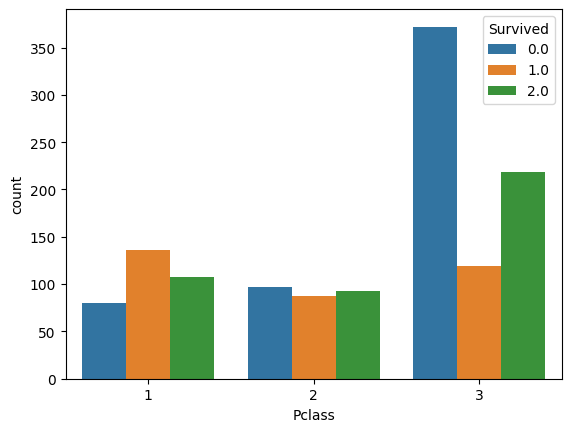

In [10]:
analise(df, 'Pclass')

*    1ª Classe. A maior parte da tripulação sobreviveu.
*    2ª Classe: A maior parte da tripulação não sobreviveu.
*    3ª Classe: é a classe com a maior parte da tripulação no geral, porém foi ondem tivemos a maior proporção de mortes.

Coluna Name

In [11]:
analise(df, df.columns[3])

Coluna: Name
Total de valores em branco: 0
Tipo de dado: object
Quantidade de valores únicos: 1307


Coluna Sex

In [12]:
analise(df, df.columns[4])

Coluna: Sex
Total de valores em branco: 0
Tipo de dado: object
Valores únicos: ['male' 'female']


In [13]:
# Verificando valores unicos na coluna 'Sexo'
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [14]:
# Alterando valores da coluna 'Sexo' para binário
df.Sex = df.Sex.replace({'male':0, 'female':1})
print(f'0 homem e 1 mulher: {df.Sex.unique()}')

0 homem e 1 mulher: [0 1]


Coluna: Sex
Total de valores em branco: 0
Tipo de dado: int64
Valores únicos: [0 1]
Analise detalhada: count    1309.000000
mean        0.355997
std         0.478997
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Sex, dtype: float64

0 - Não sobreviveu 
1 - sobreviveu 
2 - não sabemos


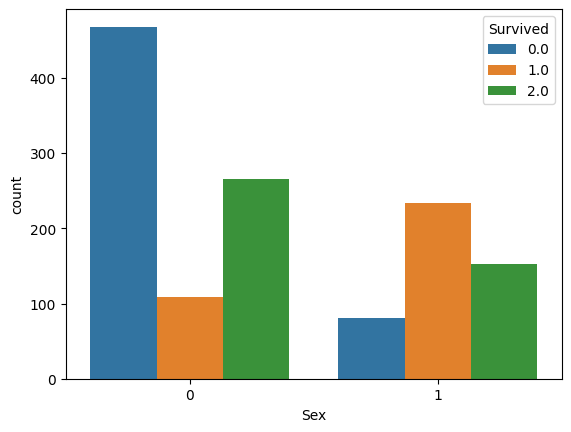

In [15]:
analise(df, df.columns[4])

Podemos ver que a maior parte dos sobreviventes são mulheres, mesmo sendo a menor parte da tripulação

Coluna: Age
Total de valores em branco: 263
Tipo de dado: float64
Quantidade de valores únicos: 99
Analise detalhada: count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

0 - Não sobreviveu 
1 - sobreviveu 
2 - não sabemos


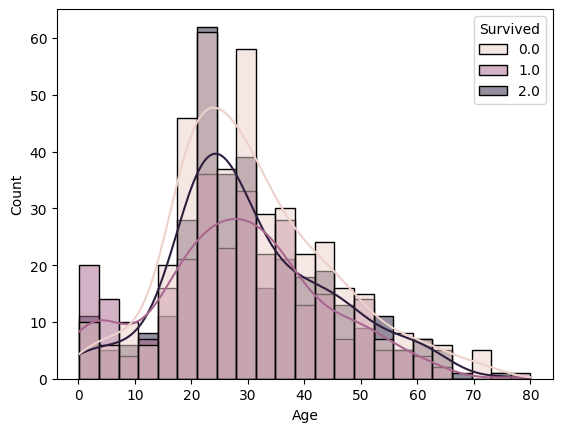

In [16]:
analise(df, df.columns[5], False)

Vamos atribuir a média de idade aos valores vazios, de acordo com a média de idade por classe.

In [17]:
for i in df.index:

    if pd.isnull(df['Age'][i]):

        if df['Pclass'][i] == 1:
            df['Age'][i] = round(df[df['Pclass'] == 1]['Age'].mean(), 0)

        elif df['Pclass'][i] == 2:
            df['Age'][i] = round(df[df['Pclass'] == 2]['Age'].mean(), 0)

        elif df['Pclass'][i] == 3:
            df['Age'][i] = round(df[df['Pclass'] == 3]['Age'].mean(), 0)

    else:
        continue

C:\Users\Alex\AppData\Local\Temp\ipykernel_14596\2230816631.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = round(df[df['Pclass'] == 3]['Age'].mean(), 0)
C:\Users\Alex\AppData\Local\Temp\ipykernel_14596\2230816631.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = round(df[df['Pclass'] == 2]['Age'].mean(), 0)
C:\Users\Alex\AppData\Local\Temp\ipykernel_14596\2230816631.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Coluna: Age
Total de valores em branco: 0
Tipo de dado: float64
Quantidade de valores únicos: 98
Analise detalhada: count    1309.000000
mean       29.378663
std        13.114583
min         0.170000
25%        22.000000
50%        26.000000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

0 - Não sobreviveu 
1 - sobreviveu 
2 - não sabemos


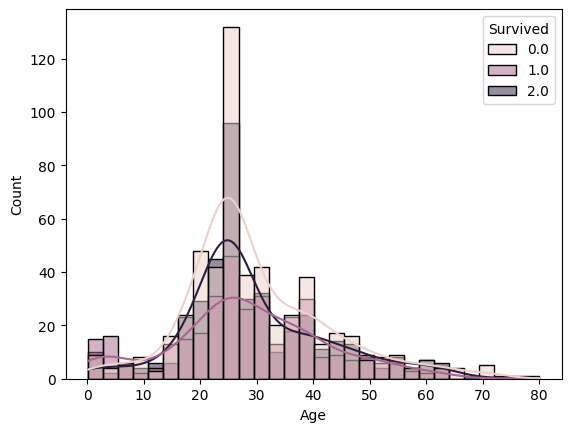

In [18]:
analise(df, df.columns[5], False)


Coluna SibSp: Número de irmãos/cônjuges a bordo

Coluna: SibSp
Total de valores em branco: 0
Tipo de dado: int64
Valores únicos: [1 0 3 4 2 5 8]
Analise detalhada: count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

0 - Não sobreviveu 
1 - sobreviveu 
2 - não sabemos


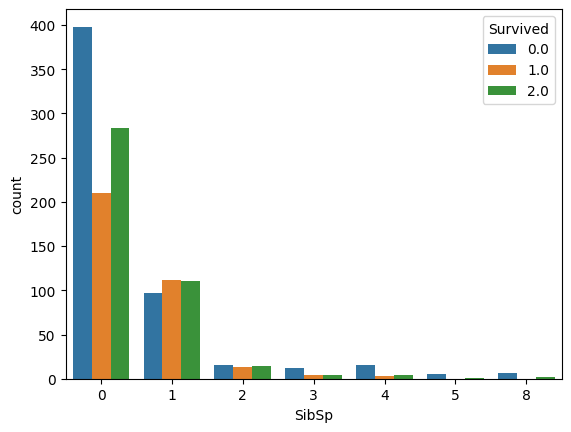

In [19]:
analise(df, df.columns[6])

Coluna Parch: Número de pais/filhos a bordo.

Coluna: Parch
Total de valores em branco: 0
Tipo de dado: int64
Valores únicos: [0 1 2 5 3 4 6 9]
Analise detalhada: count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Parch, dtype: float64

0 - Não sobreviveu 
1 - sobreviveu 
2 - não sabemos


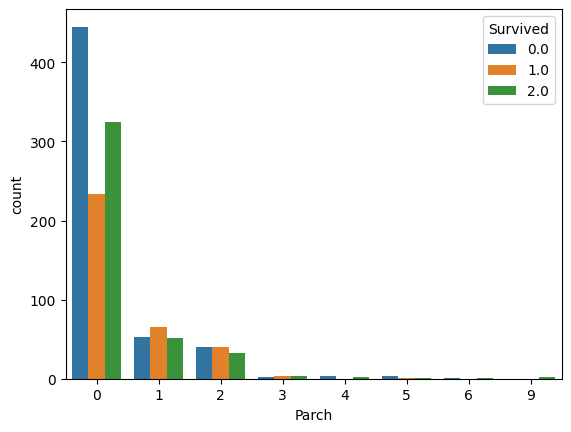

In [20]:
analise(df, df.columns[7])

Nas colunas SibSP e Parch, conseguimos visualizar que a maior parte das pessoas viajavam sozinhas, também foram elas as que menos sobreviveram.

Coluna Ticket

In [21]:
analise(df, df.columns[8])

Coluna: Ticket
Total de valores em branco: 0
Tipo de dado: object
Quantidade de valores únicos: 929


Coluna Fare: Valor pago pela passagem

Coluna: Fare
Total de valores em branco: 1
Tipo de dado: float64
Quantidade de valores únicos: 282
Analise detalhada: count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

0 - Não sobreviveu 
1 - sobreviveu 
2 - não sabemos


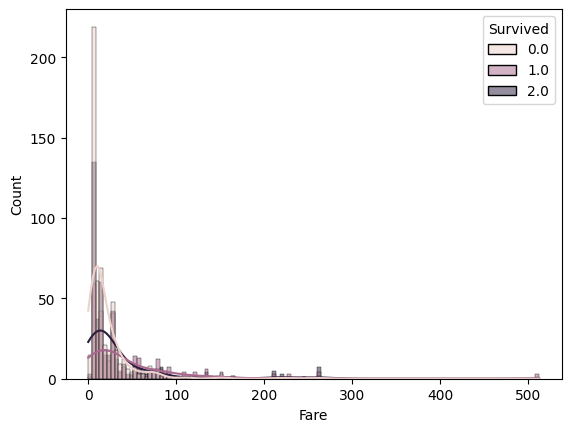

In [22]:
analise(df, df.columns[9], False)

In [23]:
df.Fare.fillna(df.Fare.mean(),inplace=True)

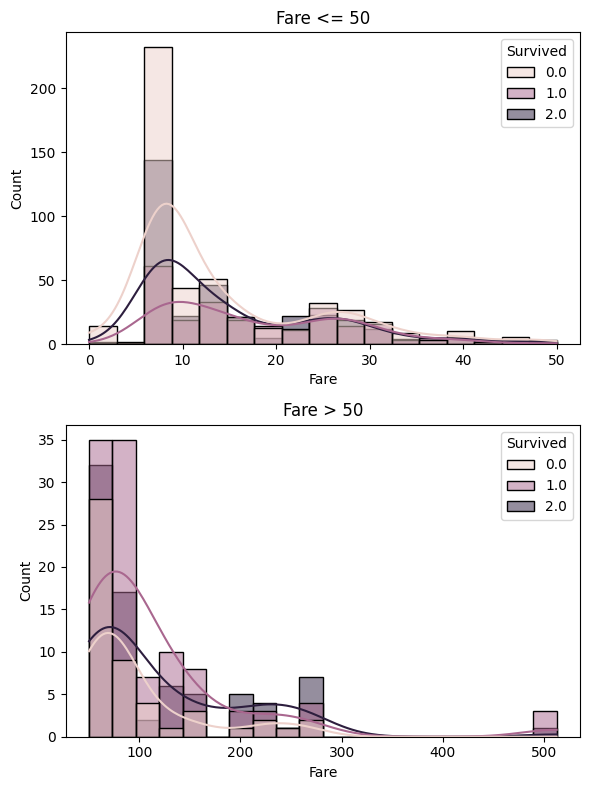

In [24]:
# Separando dados por valor para melhor visualização Filtrando os dados
fara_menor100 = df[df['Fare'] <= 50]
fare_maior100 = df[df['Fare'] > 50]

# Criando os graficos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))

# 0 a 50
sns.histplot(data=fara_menor100, x='Fare', hue='Survived', kde=True, ax=axes[0])
axes[0].set_title('Fare <= 50')

# maior que 50
sns.histplot(data=fare_maior100, x='Fare', hue='Survived', kde=True, ax=axes[1])
axes[1].set_title('Fare > 50')

plt.tight_layout()
plt.show()


A maior parte da tripulação que nao sobreviveu, foi que pagou até 10 pelo ticket

Coluna Cabin

In [25]:
analise(df, df.columns[10])

Coluna: Cabin
Total de valores em branco: 1014
Tipo de dado: object
Quantidade de valores únicos: 187


Coluna Embarked: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

In [26]:
analise(df, df.columns[11])

Coluna: Embarked
Total de valores em branco: 2
Tipo de dado: object
Valores únicos: ['S' 'C' 'Q' nan]


In [27]:
df.Embarked.fillna(1, inplace=True)
df.Embarked.isnull().sum()

0

In [28]:
df.Embarked = df.Embarked.replace({'S':1, 'C':2, 'Q':3})
df.Embarked.value_counts()

1    916
2    270
3    123
Name: Embarked, dtype: int64

Coluna: Embarked
Total de valores em branco: 0
Tipo de dado: int64
Valores únicos: [1 2 3]
Analise detalhada: count    1309.000000
mean        1.394194
std         0.653499
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Embarked, dtype: float64

0 - Não sobreviveu 
1 - sobreviveu 
2 - não sabemos


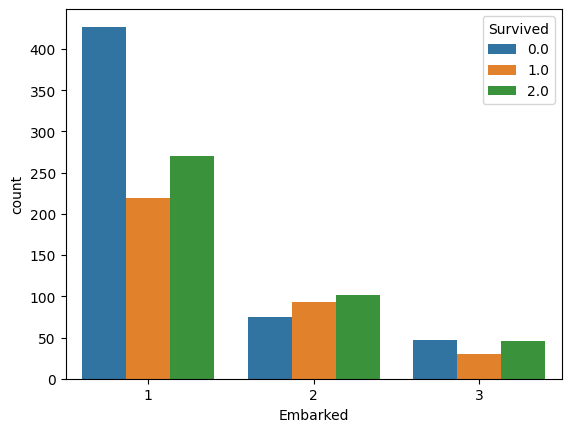

In [29]:
analise(df, df.columns[11])

A maior parte das pessoas que não sobreviveram, embarcaram em Southampton

### Visualizando Dataframe após modificações

In [30]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,2.0,3,"Spector, Mr. Woolf",0,25.0,0,0,A.5. 3236,8.0500,NaN,1
1305,1306,2.0,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,2
1306,1307,2.0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1
1307,1308,2.0,3,"Ware, Mr. Frederick",0,25.0,0,0,359309,8.0500,NaN,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 122.8+ KB


In [32]:
# Separando dataframes novamente
train = df[df['Survived'] != 2]
test = df[df['Survived'] == 2]

In [33]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1
887,888,1.0,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,25.0,1,2,W./C. 6607,23.4500,NaN,1
889,890,1.0,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2


In [34]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,892,2.0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3
892,893,2.0,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
893,894,2.0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3
894,895,2.0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
895,896,2.0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,2.0,3,"Spector, Mr. Woolf",0,25.0,0,0,A.5. 3236,8.0500,NaN,1
1305,1306,2.0,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,2
1306,1307,2.0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1
1307,1308,2.0,3,"Ware, Mr. Frederick",0,25.0,0,0,359309,8.0500,NaN,1


Visualizando correlações entre as colunas

In [35]:
train.corr()['Survived']

C:\Users\Alex\AppData\Local\Temp\ipykernel_14596\1636295906.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['Survived']


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex            0.543351
Age           -0.049633
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked       0.106811
Name: Survived, dtype: float64

Podemos identificar índices relevantes de correlações entre a colunas "Survided" e as colunas, "Pclass", "Fare" e "Sex". Sendo esta última a mais relevante.

C:\Users\Alex\AppData\Local\Temp\ipykernel_14596\1157722060.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True)


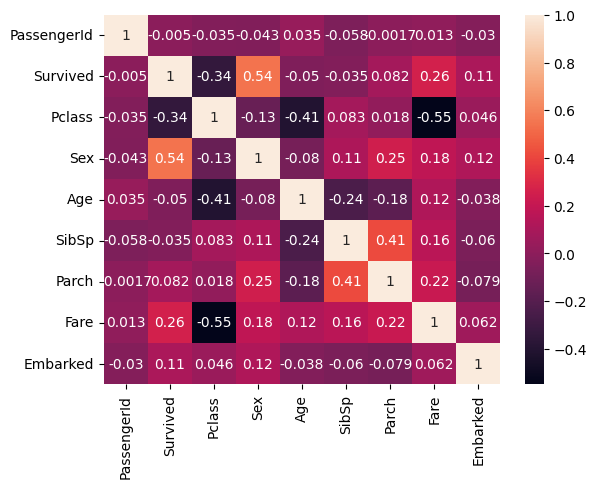

In [36]:
sns.heatmap(train.corr(), annot=True)
plt.show()


### Avaliação analítica

Analisando o que sabemos até aqui, juntamente com o restante das correlações, podemos dizer que a maior parte da tripulação que não sobreviveu, eram homens, da classe C, que viajavam sozinhos e embarcaram em Southampton. Podemos supor que grande parte destes fossem operários do navio.

## Machine Learning

### Separando dataframe e escrevendo código para treinamento

Com base na nossa analise, não vamos utilizar as colunas 'PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', por serem categóricas ou irrelevantes para o modelo.

In [37]:
X = train.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train.Survived

SEED = 1234
np.random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

def modelo(classificador):
    var_classificador = classificador()
    var_treino = var_classificador.fit(X_train, y_train)
    var_score = var_treino.score(X_test, y_test)

    print(f'Acuracy: {var_score*100:.2f}%')

### Treinando modelos de Machine Learning



DummyClassifier

In [38]:
modelo(DummyClassifier)

Acuracy: 59.19%


RandomForestClassifier

In [39]:
modelo(RandomForestClassifier)

Acuracy: 81.61%


DecisionTreeClassifier

In [40]:
modelo(DecisionTreeClassifier)

Acuracy: 78.03%


KNeighborsClassifier

In [41]:
modelo(KNeighborsClassifier)

Acuracy: 65.47%


RandomForestClassifier com Cross_validate

In [42]:
scores = cross_validate(RandomForestClassifier(), X, y, cv=5)
print(f" Acuracy entre {scores['test_score'].min()*100:.2f}% e {scores['test_score'].max()*100:.2f}%")

 Acuracy entre 78.65% e 85.39%


Vou utilizar o modelo RandomForestClassifier foi o que apresentou o melhor resultado

In [43]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
rfc_score = rfc.score(X_test, y_test)
print(f'A acuracia do modelo que será aplicado é de {rfc_score*100:.2f}%')

A acuracia do modelo que será aplicado é de 81.17%


### Aplicando modelo ao dataframe de test

In [44]:
# Sepradando colunas
X_2 = test[X.columns]
X_2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,0,34.5,0,0,7.8292,3
892,3,1,47.0,1,0,7.0000,1
893,2,0,62.0,0,0,9.6875,3
894,3,0,27.0,0,0,8.6625,1
895,3,1,22.0,1,1,12.2875,1


In [45]:
# Aplicando modelo
test['Survived'] = rfc.predict(X_2)

C:\Users\Alex\AppData\Local\Temp\ipykernel_14596\2885592442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Survived'] = rfc.predict(X_2)


### Visualizando resultado

In [46]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,892,0.0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3
892,893,0.0,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
893,894,0.0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3
894,895,1.0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
895,896,0.0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,3,"Spector, Mr. Woolf",0,25.0,0,0,A.5. 3236,8.0500,NaN,1
1305,1306,1.0,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,2
1306,1307,0.0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1
1307,1308,0.0,3,"Ware, Mr. Frederick",0,25.0,0,0,359309,8.0500,NaN,1


Visualizando por sobreviventes

Coluna: Survived
Total de valores em branco: 0
Tipo de dado: float64
Valores únicos: [0. 1.]
Analise detalhada: count    418.000000
mean       0.354067
std        0.478803
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

0 - Não sobreviveu 
1 - sobreviveu 
2 - não sabemos


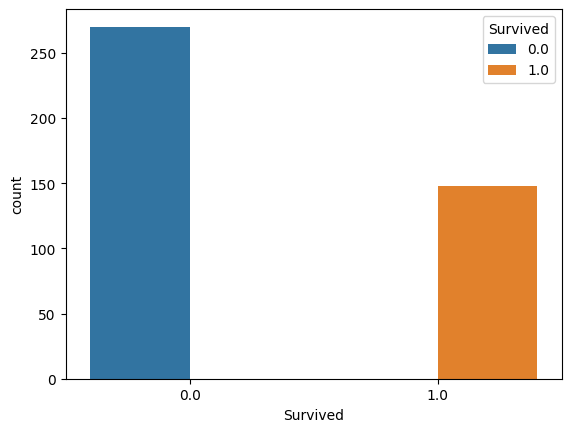

In [47]:
analise(test, 'Survived')

Visualizando resultado por classe

Coluna: Pclass
Total de valores em branco: 0
Tipo de dado: int64
Valores únicos: [3 2 1]
Analise detalhada: count    418.000000
mean       2.265550
std        0.841838
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

0 - Não sobreviveu 
1 - sobreviveu 
2 - não sabemos


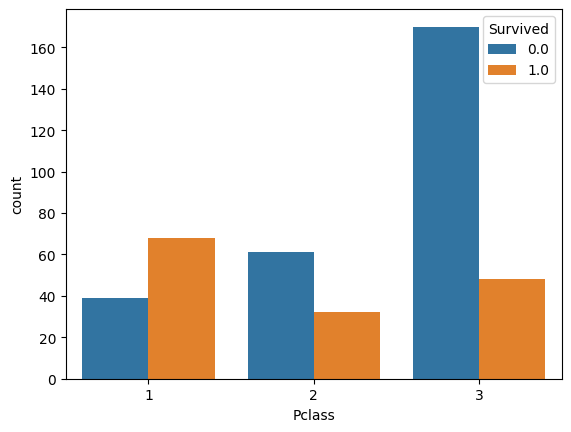

In [48]:
analise(test, 'Pclass')

Visualizando resultado por sexo

Coluna: Sex
Total de valores em branco: 0
Tipo de dado: int64
Valores únicos: [0 1]
Analise detalhada: count    418.000000
mean       0.363636
std        0.481622
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

0 - Não sobreviveu 
1 - sobreviveu 
2 - não sabemos


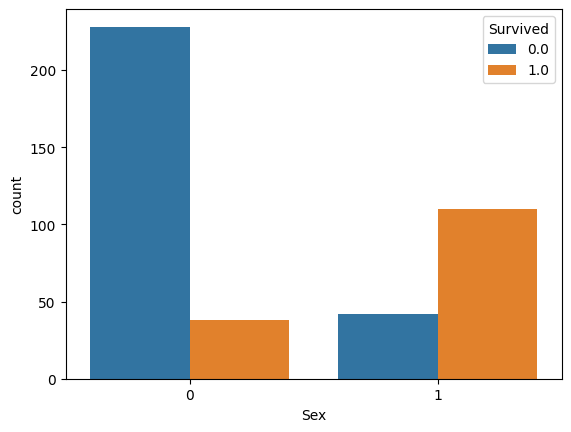

In [49]:
analise(test, 'Sex')

### Comparando resultados obtidos com os resultados fornecidos pelo gender_submission

In [50]:
comparativo = pd.merge(test, gender_submission, on='PassengerId')
comparativo = comparativo[['PassengerId', 'Survived_x', 'Survived_y']]
comparativo.columns=['PassengerId', 'Sobreviventes test', 'Sobreviventes reais']
comparativo['Acertos'] = (comparativo['Sobreviventes test'] - comparativo['Sobreviventes reais'])
comparativo


,PassengerId,Sobreviventes test,Sobreviventes reais,Acertos
0,892,0.0,0,0.0
1,893,0.0,1,-1.0
2,894,0.0,0,0.0
3,895,1.0,0,1.0
4,896,0.0,1,-1.0
...,...,...,...,...
413,1305,0.0,0,0.0
414,1306,1.0,1,0.0
415,1307,0.0,0,0.0
416,1308,0.0,0,0.0


In [51]:
print(f'A previsão de acerto foi de  {rfc_score*100:.2f}%')
print(f"A taxa real de acerto foi de {(comparativo[comparativo['Acertos']==0].shape[0]/comparativo['Acertos'].shape[0])*100:.2f}%")

A previsão de acerto foi de  81.17%
A taxa real de acerto foi de 80.86%


Finalizamos o projeto, com um percentual de acerto de 80,86%, utilizando RandomForestClassifier.